In [1]:
import pandas as pd
import numpy as np

In [2]:
import re

def clean_cell_line_name(name):
    cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', str(name))  # 移除非字母数字字符
    uppercased_name = cleaned_name.upper()  # 将所有字符转换为大写
    return uppercased_name

In [3]:
df_all = pd.read_csv('../data/drug_sensitivity.csv')
print(df_all.shape)
df_all.head()

(141222, 3)


,drug,cell_line,IC50
0,5-Fluorouracil,HL60,2.558926
1,5-azacytidine,HL60,0.917132
2,A-366,HL60,4.836160
3,ABT737,HL60,-2.817798
4,AGI-5198,HL60,3.644734


In [4]:
df_model = pd.read_csv('../Figs/data/Model.csv')
df_model['StrippedCellLineName'] = df_model['StrippedCellLineName'].apply(clean_cell_line_name)
# 取StrippedCellLineName列、ModelID列和OncotreeCode列
df_model = df_model[['StrippedCellLineName', 'ModelID', 'OncotreeCode']]
df_model.head()

,StrippedCellLineName,ModelID,OncotreeCode
0,NIHOVCAR3,ACH-000001,HGSOC
1,HL60,ACH-000002,AML
2,CACO2,ACH-000003,COAD
3,HEL,ACH-000004,AML
4,HEL9217,ACH-000005,AML


In [5]:
df_all_merged = pd.merge(df_all, df_model, left_on='cell_line', right_on='StrippedCellLineName')
# 取drug列、cell_line列、IC50列、prediction列和OncotreeCode列
df_all_merged = df_all_merged[['drug', 'cell_line', 'IC50', 'OncotreeCode']]
df_all_merged.head()

,drug,cell_line,IC50,OncotreeCode
0,5-Fluorouracil,HL60,2.558926,AML
1,5-azacytidine,HL60,0.917132,AML
2,A-366,HL60,4.836160,AML
3,ABT737,HL60,-2.817798,AML
4,AGI-5198,HL60,3.644734,AML


In [6]:
# 统计df_merged中每个OncotreeCode的数量
df_all_merged['OncotreeCode'].value_counts()

OncotreeCode
LUAD     10894
SCLC      7887
COAD      7667
PAAD      5351
GB        4713
         ...  
PRSCC      179
ABC        178
THME       153
AASTR      153
GBC        153
Name: count, Length: 118, dtype: int64

In [9]:
# 将OncotreeCode中LUAD LUSC SCLC NSCLC LCLC LUAS 全都挑选出来
# df_lung = df_all_merged[df_all_merged['OncotreeCode'].isin(['LUAD', 'LUSC', 'SCLC', 'NSCLC', 'LCLC'])]
# 这里将NSCLC剔除
df_lung = df_all_merged[df_all_merged['OncotreeCode'].isin(['LUAD', 'LUSC', 'SCLC', 'LCLC'])]
print(df_lung.shape)

(23854, 4)


In [10]:
# 根据df_lung中的cell_line列和OncotreeCode列，统计每个cell_line对应的OncotreeCode的数量
df_lung.groupby(['cell_line', 'OncotreeCode']).size()

cell_line  OncotreeCode
A427       LUAD            212
A549       LUAD            219
ABC1       LUAD            211
CALU3      LUAD            218
CALU6      LUAD            217
                          ... 
SBC5       SCLC            217
SHP77      SCLC            217
SKMES1     LUSC            217
SW1271     SCLC            218
SW1573     LUAD            217
Length: 117, dtype: int64

In [14]:
#df_lung剔除[CORL95,NCIH69,CORL279,NCIH1573,NCIH1648,NCIH1838,NCIH2009,NCIH1341,NCIH2342,NCIH2347,NCIH1703,CORL88,NCIH2171,NCIH460,NCIH1436,NCIH1734,NCIH2444,NCIH1105]
df_lung = df_lung[~df_lung['cell_line'].isin(['CORL95','NCIH69','CORL279','NCIH1573','NCIH1648','NCIH1838','NCIH2009','NCIH1341','NCIH2342','NCIH2347','NCIH1703','CORL88','NCIH2171','NCIH460','NCIH1436','NCIH1734','NCIH2444','NCIH1105','NCIH1869','NCIH1694'])]
print(df_lung.shape)

#df_lung剔除[NCIH2196,CHAGOK1,NCIH1437,NCIH146,LU134A,RERFLCMS,NCIH838,NCIH1836,BEN,CAL12T,NCIH2030,HCC33,NCIH2081,NCIH2110,NCIH2172,NCIH2291,NCIH1869,NCIH1694]
# df_lung = df_lung[~df_lung['cell_line'].isin(['NCIH2196','CHAGOK1','NCIH1437','NCIH146','LU134A','RERFLCMS','NCIH838','NCIH1836','BEN','CAL12T','NCIH2030','HCC33','NCIH2081','NCIH2110','NCIH2172','NCIH2291','NCIH1869','NCIH1694'])]
# print(df_lung.shape)

(20819, 4)


In [10]:
# 对每一个cell_line名称中，加上对应的OncotreeCode
# df_lung['cell_line'] = df_lung['OncotreeCode'] + '.' + df_lung['cell_line']

In [25]:

# df_LUNG根据cell_line分组计数，结果显示每个cell_line有多少个drug，并且保留OncotreeCode
df_LUNG_count = df_lung.groupby(['cell_line', 'OncotreeCode']).count().reset_index()[['cell_line', 'OncotreeCode', 'drug']]
df_LUNG_count.head(200)

,cell_line,OncotreeCode,drug
0,A427,LUAD,212
1,A549,LUAD,219
2,ABC1,LUAD,211
3,CALU3,LUAD,218
4,CALU6,LUAD,217
...,...,...,...
93,SBC5,SCLC,217
94,SHP77,SCLC,217
95,SKMES1,LUSC,217
96,SW1271,SCLC,218


In [26]:
# 将df_LUNG根据cell_line分组，再取每组drug列的交集
df_LUNG_drug = df_lung.groupby('cell_line')['drug'].apply(set).reset_index()
print(df_LUNG_drug.shape)
df_LUNG_drug.head()

(98, 2)


,cell_line,drug
0,A427,"{GSK-LSD1, AMG-319, KU-55933, AZD5582, Docetax..."
1,A549,"{GSK-LSD1, AMG-319, KU-55933, AZD5582, Docetax..."
2,ABC1,"{GSK-LSD1, AMG-319, KU-55933, AZD5582, Docetax..."
3,CALU3,"{GSK-LSD1, AMG-319, KU-55933, AZD5582, Docetax..."
4,CALU6,"{GSK-LSD1, AMG-319, KU-55933, AZD5582, Docetax..."


In [13]:
# drugs = {'Vincristine', 'Lestaurtinib', 'Sabutoclax', 'Teniposide', 'Afuresertib', 'Acetalax', 'AZ960', 'SN-38', 'Entospletinib', 'PRIMA-1MET', 'IWP-2', 'Refametinib', 'Erlotinib', 'Buparlisib', 'MN-64', 'Ulixertinib', 'Fulvestrant', 'Savolitinib', 'Sepantronium bromide', 'Docetaxel', 'Alpelisib', 'PLX-4720', 'PFI3', 'RO-3306', 'GW441756', 'Taselisib', 'Bleomycin', 'SCH772984', 'Entinostat', 'KU-55933', 'Dasatinib', 'Crizotinib', 'Pevonedistat', 'LMP744', 'Telomerase Inhibitor IX', 'AZD4547', 'AZD2014', 'Mitoxantrone', 'Doramapimod', 'Bortezomib', 'GSK2801', 'OF-1', 'AZD3759', 'AGI-6780', 'Sinularin', 'Afatinib', 'Uprosertib', 'SGC-CBP30', 'I-BRD9', 'Picolinici-acid', 'BMS-754807', 'Bromosporine', 'AZD5582', 'EPZ004777', 'AZD1208', 'OTX015', 'XAV939', 'KRAS (G12C) Inhibitor-12', 'Obatoclax Mesylate', 'AZD5438', 'LY2109761', 'ABT737', 'YK-4-279', 'PD0325901', 'Carmustine', 'WIKI4', 'MG-132', 'Veliparib', 'Luminespib', 'Olaparib', 'Tamoxifen', 'Gallibiscoquinazole', 'Romidepsin', 'Trametinib', 'OSI-027', 'WEHI-539', 'CZC24832', 'Epirubicin', 'AZD5991', 'Ribociclib', 'PD173074', 'Linsitinib', 'Podophyllotoxin bromide', 'Fludarabine', 'GSK2578215A', 'AZD7762', 'GSK2110183B', 'Navitoclax', 'PCI-34051', 'Dinaciclib', 'GSK-LSD1', 'Paclitaxel', 'L-Oxonoreleagnine', 'ML323', 'Zoledronate', 'AGI-5198', 'Elephantin', 'Dactinomycin', 'AZD5153', 'Staurosporine', 'Temozolomide', 'MIRA-1', 'MK-2206', 'Talazoparib', 'MK-1775', 'BMS-345541', 'Topotecan', 'AZD1332', 'VE-822', 'Mirin', 'GSK1904529A', 'Wnt-C59', 'Rucaparib', 'Motesanib', 'Nilotinib', 'RVX-208', 'Venetoclax', 'Nelarabine', 'Camptothecin', 'Ibrutinib', 'LGK974', 'P22077', 'EPZ5676', 'I-BET-762', 'SB216763', 'Cyclophosphamide', 'Ipatasertib', 'Leflunomide', 'Ruxolitinib', 'Gemcitabine', 'NVP-ADW742', 'Dactolisib', 'GDC0810', 'Vismodegib', 'Dacarbazine', 'Bosutinib', 'WZ4003', 'Niraparib', '5-Fluorouracil', 'Axitinib', 'Serdemetan', 'LCL161', 'Pictilisib', 'JQ1', 'Sorafenib', 'Gefitinib', 'Cediranib', 'GSK343', 'Palbociclib', 'Irinotecan', 'AZD8186', 'Lenalidomide', 'Vorinostat', 'BMS-536924', 'Dihydrorotenone', 'PRT062607', 'AZD5363', 'JNK Inhibitor VIII', 'Oxaliplatin', 'Schweinfurthin A', 'Tanespimycin', 'AZD6738', 'Selumetinib', 'Lapatinib', 'Avagacestat', 'Osimertinib', 'Nutlin-3a (-)'}
# 筛选出df_LUNG_drug中drug与drugs的关系是：drugs是drug的子集
# df_LUNG_drug = df_LUNG_drug[df_LUNG_drug['drug'].apply(lambda x: drugs.issubset(x))]
# print(df_LUNG_drug.shape)
# df_LUNG_drug.head(100)


In [17]:
# 将df_LUNG_drug中的drug取交集
drugs = set.intersection(*df_LUNG_drug['drug'])
print(len(drugs))
print(drugs)

135
{'KU-55933', 'AZD5582', 'Docetaxel', 'I-BET-762', 'Tamoxifen', 'AZD7762', 'PFI3', 'BMS-754807', 'BMS-536924', 'OSI-027', 'Pictilisib', 'AZ960', 'Fulvestrant', 'YK-4-279', 'Niraparib', 'NVP-ADW742', 'AGI-5198', 'AZD4547', 'RVX-208', 'VE-822', 'Picolinici-acid', 'AZD6738', 'Lenalidomide', 'ML323', 'Cyclophosphamide', 'PD0325901', 'Oxaliplatin', 'Palbociclib', 'Avagacestat', 'Selumetinib', 'Paclitaxel', 'Nilotinib', 'JQ1', 'MG-132', 'Ruxolitinib', 'OTX015', 'WZ4003', 'Crizotinib', 'Ipatasertib', 'ABT737', 'XAV939', 'MK-2206', 'Axitinib', 'Bortezomib', 'MIRA-1', 'Sabutoclax', 'Camptothecin', 'Vismodegib', 'GSK343', 'Dasatinib', 'KRAS (G12C) Inhibitor-12', 'Linsitinib', 'AZD8186', 'EPZ004777', 'Epirubicin', 'Telomerase Inhibitor IX', 'Cediranib', 'Entospletinib', 'Dactolisib', 'CZC24832', 'RO-3306', 'Bosutinib', 'Lapatinib', 'SN-38', 'PLX-4720', 'Tanespimycin', 'GSK2578215A', 'Dinaciclib', 'JNK Inhibitor VIII', 'Luminespib', 'MN-64', 'IWP-2', 'Osimertinib', 'AGI-6780', 'Ribociclib', 'Ib

In [18]:
# 将df_LUNG筛选出df_LUNG_drug中的cell_line
temp = list(df_LUNG_drug['cell_line']) + ['BEN', 'CAL12T', 'CHAGOK1', 'NCIH2110', 'NCIH2172', 'NCIH2444'] 
df_lung = df_lung[df_lung['cell_line'].isin(temp)]
print(df_lung.shape)

(20819, 4)


In [19]:
# 取df_LUNG中drug中在drugs中的数据
df_LUNG_Filtered = df_lung[df_lung['drug'].isin(drugs)][['drug', 'cell_line', 'IC50', 'OncotreeCode']]
print(df_LUNG_Filtered.shape)
df_LUNG_Filtered.head()

(13230, 4)


,drug,cell_line,IC50,OncotreeCode
1188,5-Fluorouracil,HCC827,5.191741,LUAD
1191,ABT737,HCC827,4.389625,LUAD
1192,AGI-5198,HCC827,5.698307,LUAD
1193,AGI-6780,HCC827,5.258638,LUAD
1198,AZ960,HCC827,5.047218,LUAD


In [20]:
df_drug_mean_std = pd.read_csv('../Figs/data/gdsc_drug_mean_std.csv')
df_drug_mean_std.head()

,Drug_Name,IC50_mean,IC50_std
0,123138,2.898762,0.831312
1,123829,2.586956,1.618564
2,150412,3.168315,1.088161
3,5-Fluorouracil,4.392229,1.719760
4,5-azacytidine,2.988221,1.390814


In [21]:
# 根据df_drug_mean_std中的"Drug_Name"列、"IC50_mean"列和"IC50_std"列计算出df_LUAD的Z-Score
df_LUNG_Filtered_ZScore = pd.merge(df_LUNG_Filtered, df_drug_mean_std, left_on='drug', right_on='Drug_Name')
df_LUNG_Filtered_ZScore['Z-Score'] = (df_LUNG_Filtered_ZScore['IC50'] - df_LUNG_Filtered_ZScore['IC50_mean']) / df_LUNG_Filtered_ZScore['IC50_std']
df_LUNG_Filtered_ZScore.head()

,drug,cell_line,IC50,OncotreeCode,Drug_Name,IC50_mean,IC50_std,Z-Score
0,5-Fluorouracil,HCC827,5.191741,LUAD,5-Fluorouracil,4.392229,1.719760,0.464897
1,ABT737,HCC827,4.389625,LUAD,ABT737,1.875342,2.053694,1.224273
2,AGI-5198,HCC827,5.698307,LUAD,AGI-5198,4.704103,0.907583,1.095441
3,AGI-6780,HCC827,5.258638,LUAD,AGI-6780,4.344912,1.086023,0.841351
4,AZ960,HCC827,5.047218,LUAD,AZ960,1.895669,1.724101,1.827938


In [22]:
df_LUNG_Filtered_ZScore['cell_line'] = df_LUNG_Filtered_ZScore['OncotreeCode'] + '.' + df_LUNG_Filtered_ZScore['cell_line']

In [23]:
# 使用pivot函数，将df_LUNG_Filtered_ZScore的drug列作为行索引，cell_line列作为列索引，prediction列作为值
df_LUNG_Filtered_ZScore_pivot = df_LUNG_Filtered_ZScore.pivot(index='drug', columns='cell_line', values='Z-Score')
print(df_LUNG_Filtered_ZScore_pivot.shape)
df_LUNG_Filtered_ZScore_pivot.head()

(135, 98)


cell_line,LCLC.CORL23,LCLC.IALM,LCLC.LCLC103H,LCLC.LCLC97TM1,LCLC.NCIH1155,LCLC.NCIH1299,LCLC.NCIH1581,LCLC.NCIH1915,LCLC.NCIH661,LCLC.NCIH810,...,SCLC.NCIH2196,SCLC.NCIH2227,SCLC.NCIH446,SCLC.NCIH524,SCLC.NCIH526,SCLC.NCIH82,SCLC.NCIH841,SCLC.SBC5,SCLC.SHP77,SCLC.SW1271
drug,,,,,,,,,,,,,,,,,,,,,
5-Fluorouracil,-0.023028,1.484597,0.129123,-0.383769,0.941010,-0.423213,0.272464,0.799919,1.719145,-0.280062,...,0.112198,1.193774,0.523521,-0.340665,-1.275179,-0.603658,0.906676,-0.091317,-0.216673,1.217719
ABT737,-0.158006,0.518354,1.051725,1.243479,-1.056382,1.549273,0.160356,0.743824,0.331978,-0.197523,...,-1.405697,0.138736,-0.261312,-1.539609,-2.152642,0.314318,0.395163,0.378790,-1.013628,1.738252
AGI-5198,-0.249076,0.777664,1.381737,0.849515,-1.114136,1.515039,-0.175914,0.666057,0.506214,-0.238979,...,0.041060,1.739498,-0.200385,-0.527992,0.143341,-0.510024,-0.517626,-1.924111,-0.849714,1.303016
AGI-6780,0.736375,1.062914,-0.595312,-0.681846,-0.384042,-0.394830,-1.942136,0.301778,1.157514,-0.253389,...,0.867959,1.913510,-0.410090,-1.137426,-2.093017,-1.840479,-0.603025,-1.606653,-1.689767,1.205544
AZ960,0.676381,1.027419,-0.692483,-0.170456,0.295786,-0.283051,-0.754467,-0.087395,0.837930,0.524148,...,1.707005,-0.478485,-0.999333,-1.287340,-1.167329,-1.267648,-0.055081,-0.879700,-0.238357,0.275807


C:\anaconda3\envs\torchgpu1\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


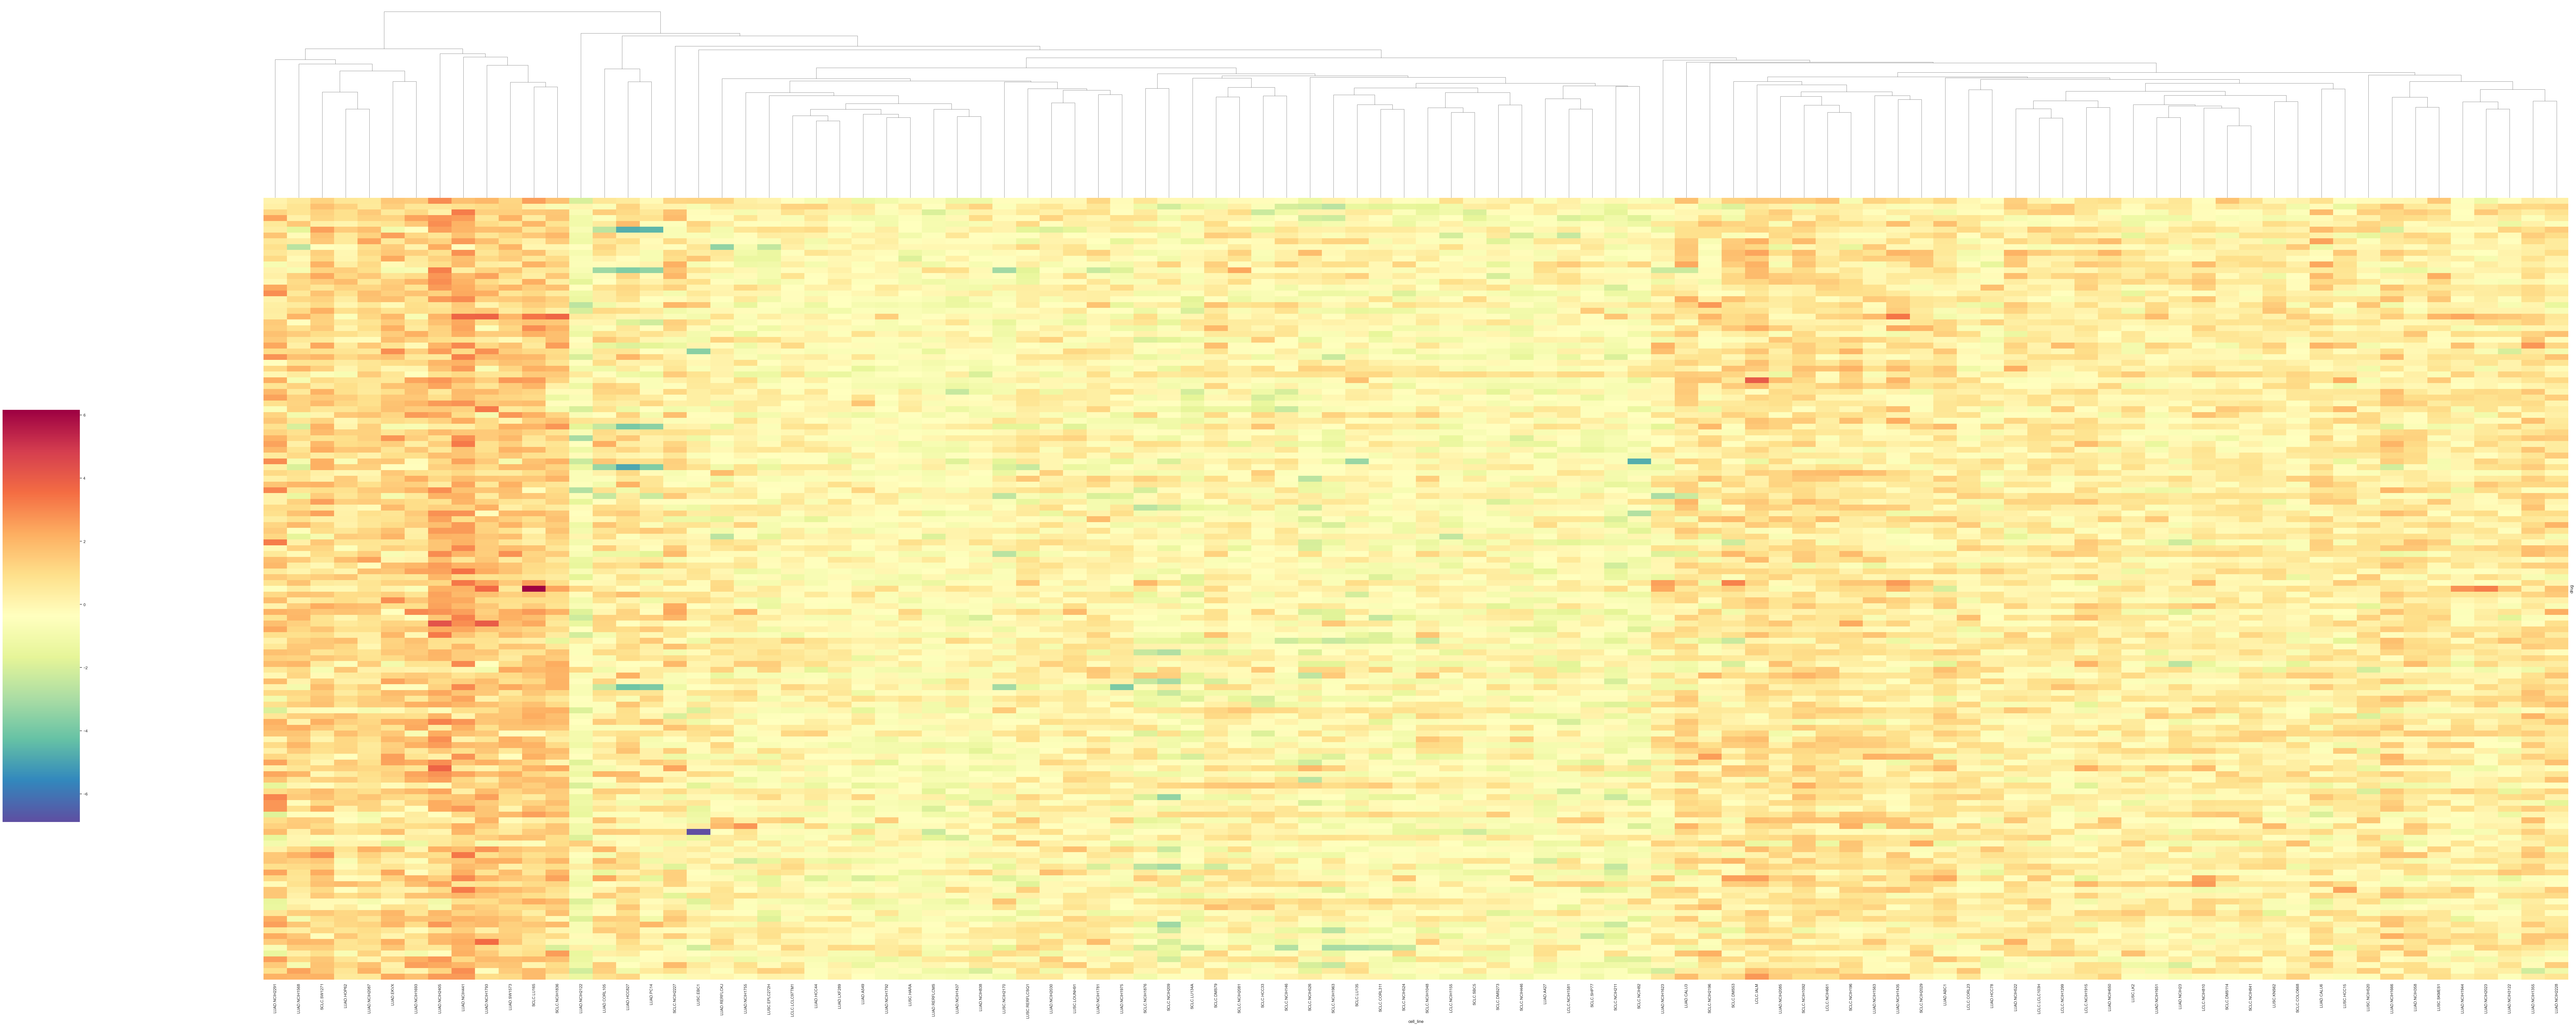

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
# iris = sns.load_dataset("iris")
# species = iris.pop("species")
# heatmap_data = pd.read_csv('heatmap_data.csv')
cell_line_names = df_LUNG_Filtered_ZScore_pivot.columns
heatmap_data = df_LUNG_Filtered_ZScore_pivot.iloc[:,0:]
#设置图片大小
g= sns.clustermap(heatmap_data,row_cluster=False,col_cluster=True, metric='euclidean',
                  fmt="d",cmap='Spectral_r',figsize=(100,40),
                  dendrogram_ratio=(.1, .2),
                    cbar_pos=(0, .2, .03, .4)
                  , yticklabels=False)
ax = g.ax_heatmap

#设置图片名称，分辨率，并保存
plt.savefig('cluster.png',dpi = 300)

plt.show()

In [ ]:

# 获取列的聚类信息
col_cluster_info = g.dendrogram_col

# 获取聚类后的顺序
col_order = g.dendrogram_col.reordered_ind

# 获取聚类的距离信息
col_linkage = g.dendrogram_col.linkage

# 打印聚类后的顺序和距离信息
print("Column order after clustering: ", col_order)
print("Column linkage: ", col_linkage)